Standard Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib.animation import FuncAnimation 
from scipy.stats import norm
from scipy.stats import multivariate_normal

Visualising some 2D Data, This will be the distribution on the floor of our 3D plot in Task 1

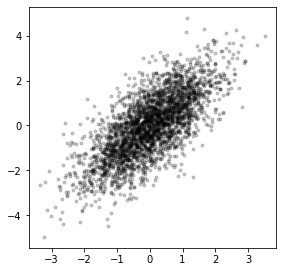

In [2]:
# Initailising Mean and Covariance Matrices
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])


# Scattering points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)



Task 1

In [3]:
# We will take mean vector and covariance matrices as inputs, so we can observe the effect of varying them 
def Task1(MeanVec=np.array([0,0]),CovMatrix=np.array([[1,0.6],[0.6,2]])): 
    
    #Generating linearly spaced x and y points for axes X and y
    x = np.linspace(-5,5,50)
    y = np.linspace(-5,5,50)

    #Getting 1-D pdf for walls
    Z_x=norm.pdf(x,loc=MeanVec[0],scale=math.sqrt(CovMatrix[0,0]))#Getting 1-D pdf for wall pdf(x)
    Z_y=norm.pdf(x,loc=MeanVec[1],scale=math.sqrt(CovMatrix[1,1]))#Getting 1-D pdf for wall pdf(y)
    
    
    #Drawing random normal samples(10000 points) from normally distributed data with mean and covariance matrix given as inputs
    Samples=np.random.multivariate_normal(MeanVec, CovMatrix, 10000) 

    #print(Samples)

    #Initialising plot and setting up limits and labels
    ax = plt.figure(figsize=(7,5)).add_subplot(projection='3d')

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(0, 0.4)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')


    #Plot 2-D distribution on the floor
    ax.scatter(Samples[:,0],Samples[:,1],zs=0,zdir='z',s=5)


    #For better viewing
    ax.view_init(elev=45., azim=-55)


    #Plotting pdf(x)
    ax.plot(x,Z_x,zs=5, zdir='y', lw=2)
    ax.set_xlabel('x')
    ax.set_zlabel('pdf(x)')


    #Plotting pdf(y)
    ax.plot(x,Z_y,zs=-5, zdir='x', lw=2)
    ax.set_xlabel('x')



Varying mean and calling the function repeatedly

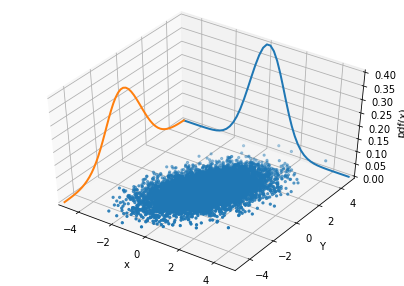

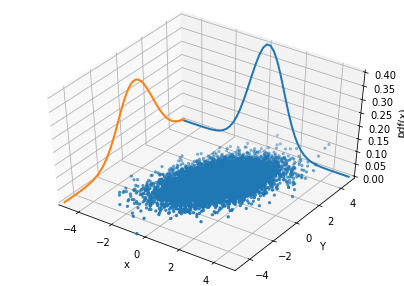

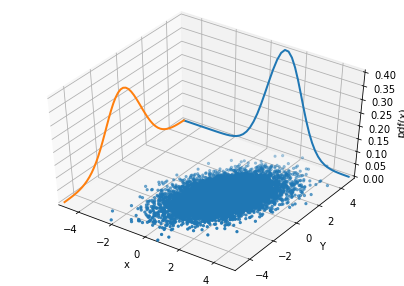

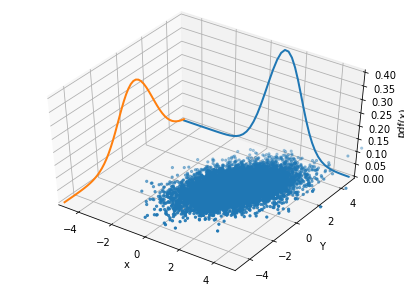

In [4]:
#Task 1(i) Varying Mean

#Varying Mean Vector
Task1()
Task1(np.array([0,1]))
Task1(np.array([1,0]))
Task1(np.array([1,1]))



Task 1(ii) Varying Variance

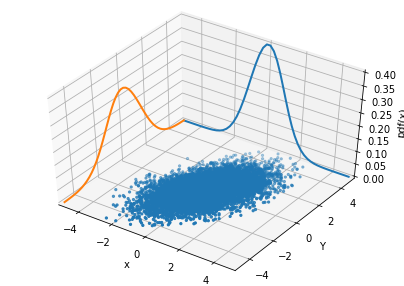

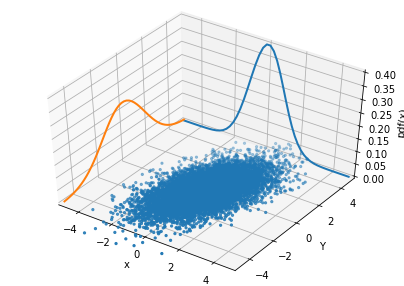

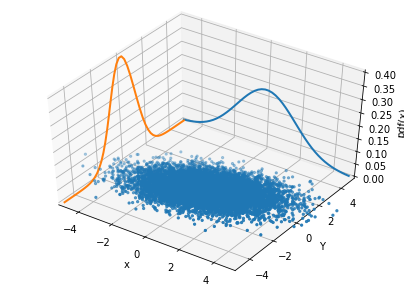

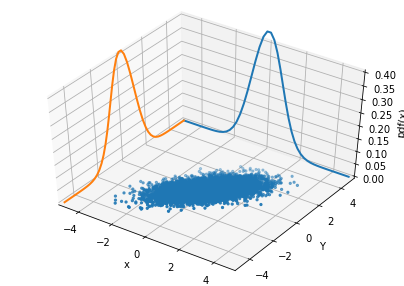

In [5]:
#Task 1(ii) Varying Variance
#Varying Variance
Task1()
Task1(CovMatrix=np.array([[1,0.6],[0.6,3]]))
Task1(CovMatrix=np.array([[3,0.6],[0.6,1]]))
Task1(CovMatrix=np.array([[0.8,0.6],[0.6,0.9]]))




Task 1(iii) Varying Covariance

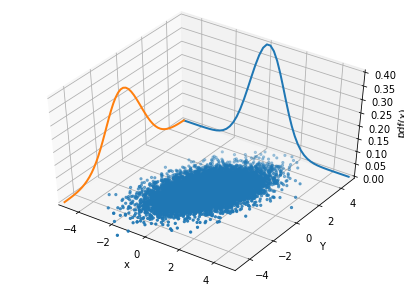

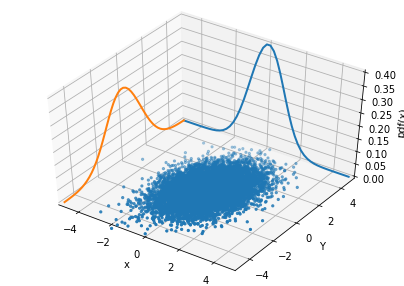

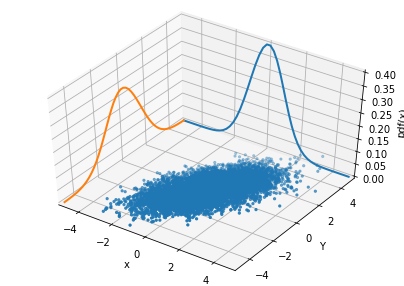

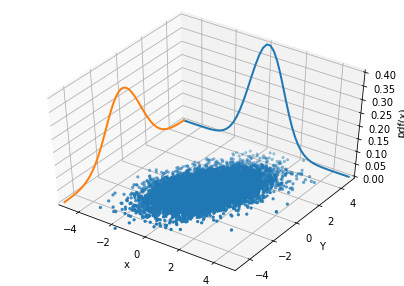

In [6]:
#Task 1(iii) Varying Covariance

#Varying Covariance by varying correlation and keeping individual varainces constant
Task1()
Task1(CovMatrix=np.array([[1,0.2],[0.2,2]]))
Task1(CovMatrix=np.array([[1,0.8],[0.8,2]]))
Task1(CovMatrix=np.array([[1,0.6],[0.6,2]]))

Task 2
(i)N=3

In [7]:
#Task2(i) N=3

In [8]:
#Define covariance matrix

CovMatrix=np.array([[1,0.5,0.4],[0.5,1,0.5],[0.4,0.5,1]]) #Assumed covariance matrix with variances =[1,1,1]
Mean=np.array([0,0,0]) #Assuming mean vector=[0,0,0]

#Perform Cholesky decomposition of CovMatrix

L=np.linalg.cholesky(CovMatrix)


In [9]:
np.dot(L, np.transpose(L)) #Checking if Cholesky decomposition worked, i.e. checking if our assumed covariance matrix was positive definite

array([[1. , 0.5, 0.4],
       [0.5, 1. , 0.5],
       [0.4, 0.5, 1. ]])

In [10]:
u = np.random.normal(loc=0, scale=1, size=3*1000).reshape(3, 1000) 

Drawing 1000 samples from each of the x's. The formula used in x=m+Lu, where u is a gaussian distributed variable of required size and x has a gaussian distribution due to the affine transformation

In [11]:
x = np.dot(L, u) # The general formula is x=m+Lu where m is the mean vector. Taking the mean vector to be zero for simplicity

In [12]:
print("Drawing 1000 samples from each component of Gaussian for N=3")
x

Drawing 1000 samples from each component of Gaussian for N=3


array([[ 0.12395127,  0.32162739, -1.9911848 , ..., -0.17184132,
        -0.29124136,  0.15866456],
       [-0.13785531,  0.44955587, -0.51319528, ..., -0.35482427,
        -1.93753507, -0.22525063],
       [-0.0072565 , -0.38071893,  0.18884799, ...,  0.40176474,
        -0.59141623,  0.27397058]])

Calculating mean, variances and covariance matrix to show these match with presumed values

In [13]:
mean=[]
for i in range(3):
    mean.append(sum(x[i,])/1000)

In [14]:
mean

[0.03186063045666651, 0.020669095582599564, 0.04624706358769091]

In [15]:
variance=[]
for i in range(3):
    temp=0
    for j in range(1000):
        temp+=(x[i,j]-mean[i])**2
    variance.append(temp/1000)
    
variance

[0.9492702103438426, 1.0154167736591657, 1.1173924453343014]

In [16]:
covariance=np.zeros((3,3))
for i in range(3):
    for j in range(3):
        temp=0
        for k in range(1000):
            temp+=(x[i,k]-mean[i])*(x[j,k]-mean[j])
        covariance[i,j]=temp/1000
        
covariance

array([[0.94927021, 0.52334607, 0.43680298],
       [0.52334607, 1.01541677, 0.57174562],
       [0.43680298, 0.57174562, 1.11739245]])

In [17]:
print("Assumed value of Mean= [0,0,0]")
print("Mean calculated from drawn random samples"+str(mean))
print("Assumed value of Variances=[1,1,1]")
print("Variance calculated from drawn random samples"+str(variance))
print("Assumed Covariance Matrix")
print(CovMatrix)
print("Covariance Matrix constructed from random samples")
print(covariance)

Assumed value of Mean= [0,0,0]
Mean calculated from drawn random samples[0.03186063045666651, 0.020669095582599564, 0.04624706358769091]
Assumed value of Variances=[1,1,1]
Variance calculated from drawn random samples[0.9492702103438426, 1.0154167736591657, 1.1173924453343014]
Assumed Covariance Matrix
[[1.  0.5 0.4]
 [0.5 1.  0.5]
 [0.4 0.5 1. ]]
Covariance Matrix constructed from random samples
[[0.94927021 0.52334607 0.43680298]
 [0.52334607 1.01541677 0.57174562]
 [0.43680298 0.57174562 1.11739245]]


Task 2(ii) N=5

In [18]:
#Task 2(ii) N=5

In [19]:
#Define covariance matrix

CovMatrix=np.array([[1,0.5,0.4,0.3,0.2],[0.5,1,0.4,0.3,0.2],[0.4,0.4,1,0.3,0.2],[0.3,0.3,0.3,1,0.2],[0.2,0.2,0.2,0.2,0.1]])
Mean=np.array([0,0,0])

#Perform Cholesky decomposition of CovMatrix

L=np.linalg.cholesky(CovMatrix)

In [20]:
u = np.random.normal(loc=0, scale=1, size=5*1000).reshape(5, 1000)

In [21]:
x = np.dot(L, u)

In [22]:
x

array([[-1.56927198, -0.81534788, -0.77862728, ...,  1.63433881,
         1.09438378,  0.50207203],
       [ 0.00320922,  0.19859781, -1.78758496, ...,  0.03617925,
         0.32901251,  0.20120053],
       [-1.1377472 ,  0.76555427, -0.89480752, ...,  0.5604346 ,
        -0.75170083, -0.36280622],
       [-0.5659966 ,  1.03032361, -1.51219181, ...,  3.08786933,
         1.13514689,  1.07063087],
       [-0.43393346,  0.39582399, -0.65864221, ...,  0.476401  ,
         0.29017651,  0.24536202]])

Task 3 Calculating mean, variances and covariance matrix to show these match with presumed values

In [23]:
mean=[]
for i in range(5):
    mean.append(sum(x[i,])/1000)

In [24]:
mean

[-0.01809257456395484,
 -0.0061288584509001254,
 -0.03249816309828308,
 -0.015809344197540553,
 -0.0061554555873651615]

In [25]:
variance=[]
for i in range(5):
    temp=0
    for j in range(1000):
        temp+=(x[i,j]-mean[i])**2
    variance.append(temp/1000)
    
variance

[0.9581927974474662,
 1.015224279588898,
 1.0180001917607688,
 1.0541759540323972,
 0.09739838744248551]

In [26]:
covariance=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        temp=0
        for k in range(1000):
            temp+=(x[i,k]-mean[i])*(x[j,k]-mean[j])
        covariance[i,j]=temp/1000
        
covariance

array([[0.9581928 , 0.50337206, 0.37285874, 0.30326229, 0.19166222],
       [0.50337206, 1.01522428, 0.38327523, 0.3091882 , 0.19173603],
       [0.37285874, 0.38327523, 1.01800019, 0.30724073, 0.19812866],
       [0.30326229, 0.3091882 , 0.30724073, 1.05417595, 0.20439242],
       [0.19166222, 0.19173603, 0.19812866, 0.20439242, 0.09739839]])

In [27]:
print("Assumed value of Mean=[0,0,0,0,0]")
print("Mean calculated from drawn random samples"+str(mean))
print("Assumed value of Variances=[1,1,1,1,1]")
print("Variance calculated from drawn random samples"+str(variance))
print("Assumed Covariance Matrix")
print(CovMatrix)
print("Covariance Matrix constructed from random samples")
print(covariance)

Assumed value of Mean=[0,0,0,0,0]
Mean calculated from drawn random samples[-0.01809257456395484, -0.0061288584509001254, -0.03249816309828308, -0.015809344197540553, -0.0061554555873651615]
Assumed value of Variances=[1,1,1,1,1]
Variance calculated from drawn random samples[0.9581927974474662, 1.015224279588898, 1.0180001917607688, 1.0541759540323972, 0.09739838744248551]
Assumed Covariance Matrix
[[1.  0.5 0.4 0.3 0.2]
 [0.5 1.  0.4 0.3 0.2]
 [0.4 0.4 1.  0.3 0.2]
 [0.3 0.3 0.3 1.  0.2]
 [0.2 0.2 0.2 0.2 0.1]]
Covariance Matrix constructed from random samples
[[0.9581928  0.50337206 0.37285874 0.30326229 0.19166222]
 [0.50337206 1.01522428 0.38327523 0.3091882  0.19173603]
 [0.37285874 0.38327523 1.01800019 0.30724073 0.19812866]
 [0.30326229 0.3091882  0.30724073 1.05417595 0.20439242]
 [0.19166222 0.19173603 0.19812866 0.20439242 0.09739839]]


Task 4, Implementing 3 covariance functions

In [28]:
def squaredExponentialKernel(a, b, l=1.0, sigma=1.0):
    sqdist = (a-b)**2
    return sigma**2 * np.exp((-0.5 / l**2) * sqdist)

def PeriodicKernel(a, b, l=1.0, sigma=1.0,p=2.0):
    dist = np.sin(np.pi*np.abs(a-b)/p)**2
    return sigma**2 * np.exp((-0.5 / l**2) * dist)

def rationalQuadratic(a,b,l=1.0,sigma=1.0):
    return np.power(1+((a-b)**2/(2*l*sigma**2)),l)
    

In [29]:
CovMatrix1=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrix1[i][j]=squaredExponentialKernel(X[i],X[j])
        
#L=np.linalg.cholesky(CovMatrix)
print(CovMatrix1)


[[1.         0.6004043  0.12994966 ... 0.         0.         0.        ]
 [0.6004043  1.         0.6004043  ... 0.         0.         0.        ]
 [0.12994966 0.6004043  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.6004043  0.12994966]
 [0.         0.         0.         ... 0.6004043  1.         0.6004043 ]
 [0.         0.         0.         ... 0.12994966 0.6004043  1.        ]]


In [30]:
CovMatrix2=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrix2[i][j]=PeriodicKernel(X[i],X[j])
        
#L=np.linalg.cholesky(CovMatrix)
print(CovMatrix2)


[[1.         0.60660701 0.9994968  ... 0.9994968  0.60660701 1.        ]
 [0.60660701 1.         0.60660701 ... 0.60721765 0.9994968  0.60660701]
 [0.9994968  0.60660701 1.         ... 0.99799072 0.60721765 0.9994968 ]
 ...
 [0.9994968  0.60721765 0.99799072 ... 1.         0.60660701 0.9994968 ]
 [0.60660701 0.9994968  0.60721765 ... 0.60660701 1.         0.60660701]
 [1.         0.60660701 0.9994968  ... 0.9994968  0.60660701 1.        ]]


In [31]:
CovMatrix3=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrix3[i][j]=rationalQuadratic(X[i],X[j])
        
#L=np.linalg.cholesky(CovMatrix)
print(CovMatrix3)

[[1.00000000e+00 1.51015203e+00 3.04060810e+00 ... 4.80102041e+03
  4.90050005e+03 5.00100000e+03]
 [1.51015203e+00 1.00000000e+00 1.51015203e+00 ... 4.70256107e+03
  4.80102041e+03 4.90050005e+03]
 [3.04060810e+00 1.51015203e+00 1.00000000e+00 ... 4.60512203e+03
  4.70256107e+03 4.80102041e+03]
 ...
 [4.80102041e+03 4.70256107e+03 4.60512203e+03 ... 1.00000000e+00
  1.51015203e+00 3.04060810e+00]
 [4.90050005e+03 4.80102041e+03 4.70256107e+03 ... 1.51015203e+00
  1.00000000e+00 1.51015203e+00]
 [5.00100000e+03 4.90050005e+03 4.80102041e+03 ... 3.04060810e+00
  1.51015203e+00 1.00000000e+00]]


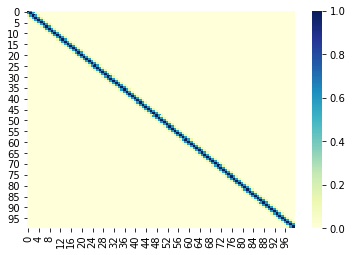

In [32]:
import seaborn as sns
sns.set

ax1 = sns.heatmap(CovMatrix1,cmap="YlGnBu")



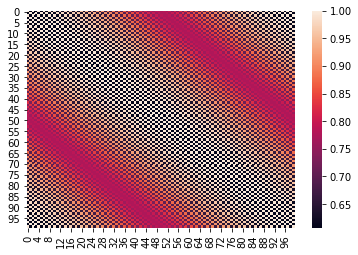

In [33]:
ax2 = sns.heatmap(CovMatrix2)

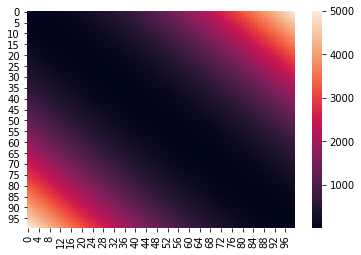

In [34]:
ax3 = sns.heatmap(CovMatrix3)

Task 5
(A) We will vary the hyperparameters for the periodic kernel

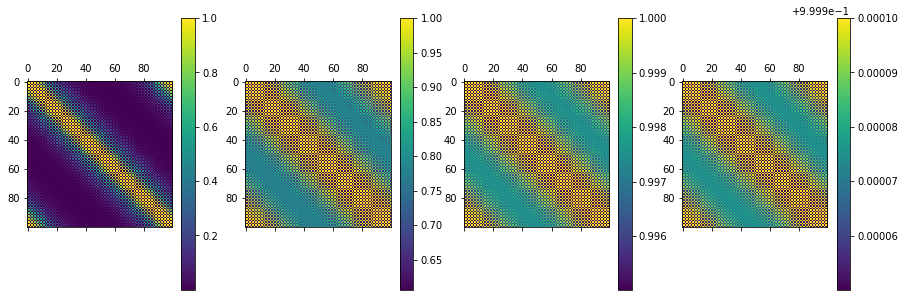

In [35]:
#Varying l
CovMatrixA=np.zeros((100,100))
CovMatrixB=np.zeros((100,100))
CovMatrixC=np.zeros((100,100))
CovMatrixD=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrixA[i][j]=PeriodicKernel(X[i],X[j],0.2)
        CovMatrixB[i][j]=PeriodicKernel(X[i],X[j],1)
        CovMatrixC[i][j]=PeriodicKernel(X[i],X[j],10)
        CovMatrixD[i][j]=PeriodicKernel(X[i],X[j],100)
        
        
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))

ax1, ax2, ax3, ax4= axes

im1 = ax1.matshow(CovMatrixA)
im2 = ax2.matshow(CovMatrixB)
im3 = ax3.matshow(CovMatrixC)
im4 = ax4.matshow(CovMatrixD)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

        

        


In [36]:
#Observations

'''
Increasing l first increases the value of all points but their distibution remains same(Also, max value is not increased beyond 1). This happens uptill a certain value

Increasing l beyond that again decreases the number of points with high values. The max value here is reduced. We can say that the value of all points is decreased



'''


'\nIncreasing l first increases the value of all points but their distibution remains same(Also, max value is not increased beyond 1). This happens uptill a certain value\n\nIncreasing l beyond that again decreases the number of points with high values. The max value here is reduced. We can say that the value of all points is decreased\n\n\n\n'

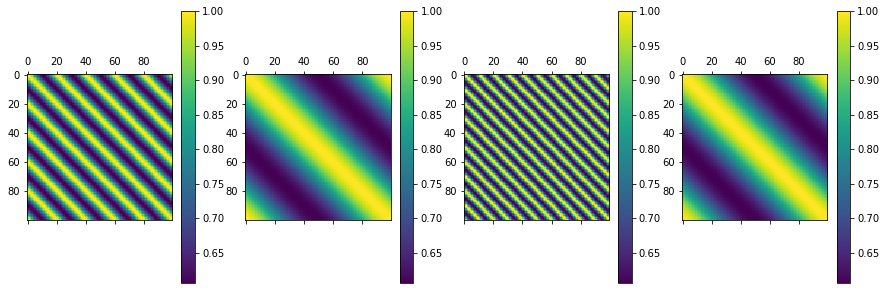

In [37]:
#Varying p
CovMatrixA=np.zeros((100,100))
CovMatrixB=np.zeros((100,100))
CovMatrixC=np.zeros((100,100))
CovMatrixD=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrixA[i][j]=PeriodicKernel(X[i],X[j],p=0.2)
        CovMatrixB[i][j]=PeriodicKernel(X[i],X[j],p=1)
        CovMatrixC[i][j]=PeriodicKernel(X[i],X[j],p=10)
        CovMatrixD[i][j]=PeriodicKernel(X[i],X[j],p=100)
        
        
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))

ax1, ax2, ax3, ax4= axes

im1 = ax1.matshow(CovMatrixA)
im2 = ax2.matshow(CovMatrixB)
im3 = ax3.matshow(CovMatrixC)
im4 = ax4.matshow(CovMatrixD)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)


In [38]:
'''Observations

Changing p brings about a periodic pattern. Increasing p first increases the number of points with low value. 

Then after reaching a certain value of p, number of points with high value increases again 

and then the pattern repeats.

Thus the bands of values spread and shrink periodically

'''

'Observations\n\nChanging p brings about a periodic pattern. Increasing p first increases the number of points with low value. \n\nThen after reaching a certain value of p, number of points with high value increases again \n\nand then the pattern repeats.\n\nThus the bands of values spread and shrink periodically\n\n'

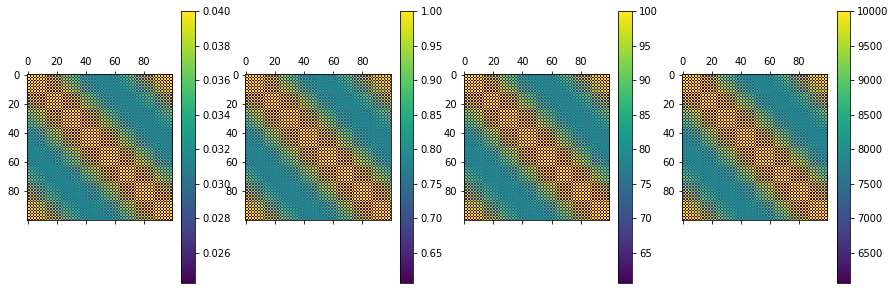

In [39]:
#Varying sigma
CovMatrixA=np.zeros((100,100))
CovMatrixB=np.zeros((100,100))
CovMatrixC=np.zeros((100,100))
CovMatrixD=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrixA[i][j]=PeriodicKernel(X[i],X[j],sigma=0.2)
        CovMatrixB[i][j]=PeriodicKernel(X[i],X[j],sigma=1)
        CovMatrixC[i][j]=PeriodicKernel(X[i],X[j],sigma=10)
        CovMatrixD[i][j]=PeriodicKernel(X[i],X[j],sigma=100)
        
        
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))

ax1, ax2, ax3, ax4= axes

im1 = ax1.matshow(CovMatrixA)
im2 = ax2.matshow(CovMatrixB)
im3 = ax3.matshow(CovMatrixC)
im4 = ax4.matshow(CovMatrixD)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

In [40]:
'''Observations
Increasing sigma increases the value of all points monotnoically


Thus the bands dont spread but get more intense
'''

'Observations\nIncreasing sigma increases the value of all points monotnoically\n\n\nThus the bands dont spread but get more intense\n'

Varying paramters for squared exponential Kernel

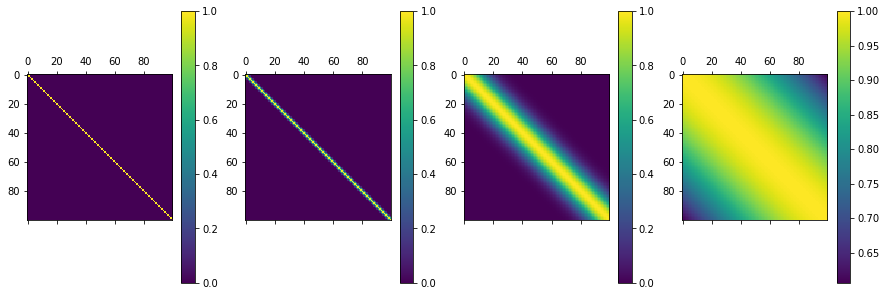

In [41]:
# Varying l
CovMatrixA=np.zeros((100,100))
CovMatrixB=np.zeros((100,100))
CovMatrixC=np.zeros((100,100))
CovMatrixD=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrixA[i][j]=squaredExponentialKernel(X[i],X[j],0.2)
        CovMatrixB[i][j]=squaredExponentialKernel(X[i],X[j],1)
        CovMatrixC[i][j]=squaredExponentialKernel(X[i],X[j],10)
        CovMatrixD[i][j]=squaredExponentialKernel(X[i],X[j],100)
        
        
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))

ax1, ax2, ax3, ax4= axes

im1 = ax1.matshow(CovMatrixA)
im2 = ax2.matshow(CovMatrixB)
im3 = ax3.matshow(CovMatrixC)
im4 = ax4.matshow(CovMatrixD)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)


In [42]:
'''Observations
Increasing value of l increases the number of points with higher values([It doesn't increase the maximum value]), or it increases the number of points lying in the 

higher spectrum of values.(We can easily see this by the increasing width of band of yellow points in the figures)

Or, we can say the band doesnt change intensity but changes distribution and bands representing higher values spread.


'''

"Observations\nIncreasing value of l increases the number of points with higher values([It doesn't increase the maximum value]), or it increases the number of points lying in the \n\nhigher spectrum of values.(We can easily see this by the increasing width of band of yellow points in the figures)\n\nOr, we can say the band doesnt change intensity but changes distribution and bands representing higher values spread.\n\n\n"

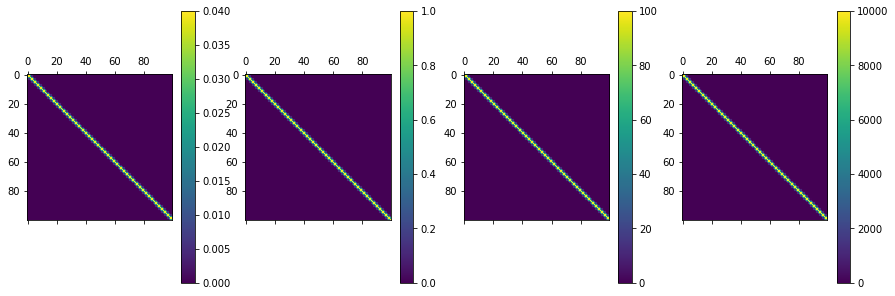

In [43]:
#Varying sigma
CovMatrixA=np.zeros((100,100))
CovMatrixB=np.zeros((100,100))
CovMatrixC=np.zeros((100,100))
CovMatrixD=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrixA[i][j]=squaredExponentialKernel(X[i],X[j],sigma=0.2)
        CovMatrixB[i][j]=squaredExponentialKernel(X[i],X[j],sigma=1)
        CovMatrixC[i][j]=squaredExponentialKernel(X[i],X[j],sigma=10)
        CovMatrixD[i][j]=squaredExponentialKernel(X[i],X[j],sigma=100)
        
        
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))

ax1, ax2, ax3, ax4= axes

im1 = ax1.matshow(CovMatrixA)
im2 = ax2.matshow(CovMatrixB)
im3 = ax3.matshow(CovMatrixC)
im4 = ax4.matshow(CovMatrixD)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

In [44]:
'''Observations
Varying sigma increases the value of all entries of matrix. Thus the band doesn't spread but gets more intense
(the green colour) now represents a much higher value



'''

"Observations\nVarying sigma increases the value of all entries of matrix. Thus the band doesn't spread but gets more intense\n(the green colour) now represents a much higher value\n\n\n\n"

Varying paramters for rational Quadratic Kernel

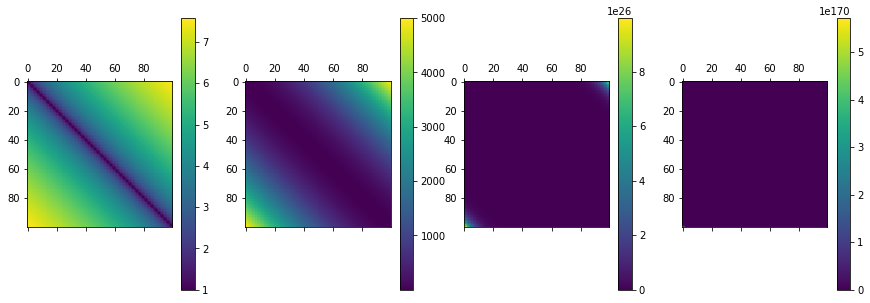

In [45]:
#Varying l
CovMatrixA=np.zeros((100,100))
CovMatrixB=np.zeros((100,100))
CovMatrixC=np.zeros((100,100))
CovMatrixD=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrixA[i][j]=rationalQuadratic(X[i],X[j],0.2)
        CovMatrixB[i][j]=rationalQuadratic(X[i],X[j],1)
        CovMatrixC[i][j]=rationalQuadratic(X[i],X[j],10)
        CovMatrixD[i][j]=rationalQuadratic(X[i],X[j],100)
        
        
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))

ax1, ax2, ax3, ax4= axes

im1 = ax1.matshow(CovMatrixA)
im2 = ax2.matshow(CovMatrixB)
im3 = ax3.matshow(CovMatrixC)
im4 = ax4.matshow(CovMatrixD)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

In [46]:
'''Observations


Varying l decreases the value of all entries of matrix(non-zero). Thus the bands don't shrink but get less intense
(the yellow colour) now represents a much lower value



'''

"Observations\n\n\nVarying l decreases the value of all entries of matrix(non-zero). Thus the bands don't shrink but get less intense\n(the yellow colour) now represents a much lower value\n\n\n\n"

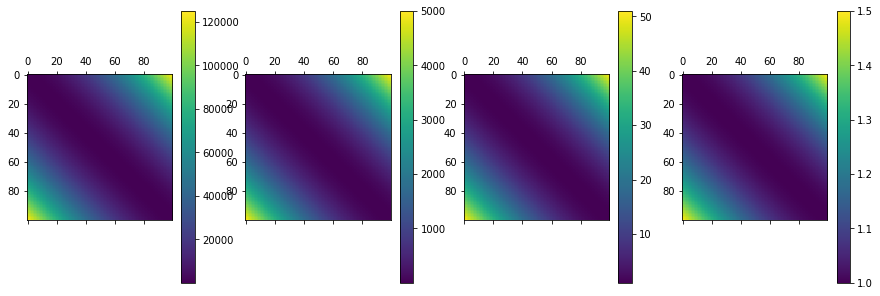

In [47]:
#Varying sigma
CovMatrixA=np.zeros((100,100))
CovMatrixB=np.zeros((100,100))
CovMatrixC=np.zeros((100,100))
CovMatrixD=np.zeros((100,100))
X = np.linspace(0,100,100)
for i in range(0,100):
    for j in range(0,100):
        CovMatrixA[i][j]=rationalQuadratic(X[i],X[j],sigma=0.2)
        CovMatrixB[i][j]=rationalQuadratic(X[i],X[j],sigma=1)
        CovMatrixC[i][j]=rationalQuadratic(X[i],X[j],sigma=10)
        CovMatrixD[i][j]=rationalQuadratic(X[i],X[j],sigma=100)
        
        
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))

ax1, ax2, ax3, ax4= axes

im1 = ax1.matshow(CovMatrixA)
im2 = ax2.matshow(CovMatrixB)
im3 = ax3.matshow(CovMatrixC)
im4 = ax4.matshow(CovMatrixD)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

In [48]:
'''
Varying sigma decreases the value of all entries of matrix(non-zero). Thus the bands don't shrink but get less intense
(the yellow colour) now represents a much lower value


'''

"\nVarying sigma decreases the value of all entries of matrix(non-zero). Thus the bands don't shrink but get less intense\n(the yellow colour) now represents a much lower value\n\n\n"

Task 6

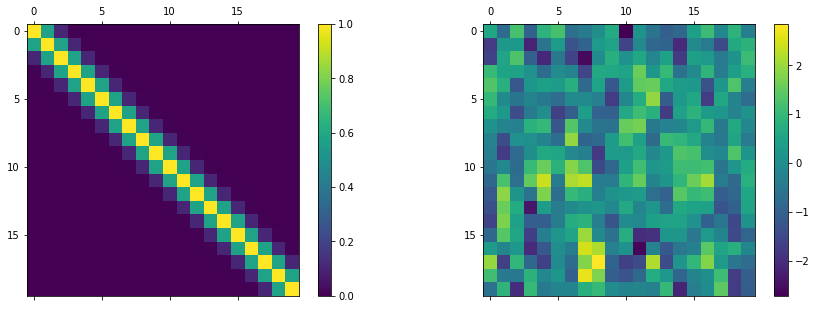

In [49]:
#generating Covariance Matrix
CovMatrix=np.zeros((20,20))
X = np.linspace(0,20,20)
for i in range(0,20):
    for j in range(0,20):
        CovMatrix[i][j]=squaredExponentialKernel(X[i],X[j])
        

#Sampling
L=np.linalg.cholesky(CovMatrix)

u = np.random.normal(loc=0, scale=1, size=20*20).reshape(20, 20)

x = np.dot(L, u)

#Drawing subplots

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

ax1, ax2= axes

im1 = ax1.matshow(CovMatrix)
im2 = ax2.matshow(x)


fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)




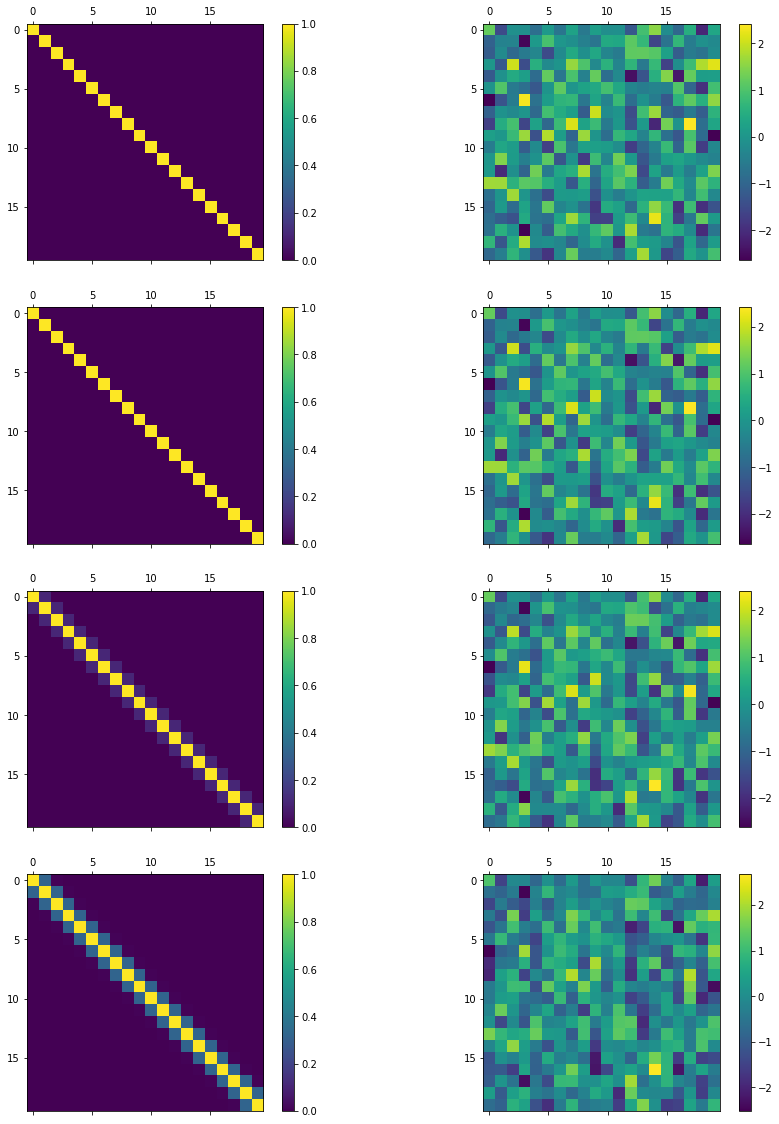

In [50]:
#Varying hyperparameters 
#(i) Varying l

CovMatrixA=np.zeros((20,20))
CovMatrixB=np.zeros((20,20))
CovMatrixC=np.zeros((20,20))
CovMatrixD=np.zeros((20,20))
X = np.linspace(0,20,20)
for i in range(0,20):
    for j in range(0,20):
        CovMatrixA[i][j]=squaredExponentialKernel(X[i],X[j],l=0.2)
        CovMatrixB[i][j]=squaredExponentialKernel(X[i],X[j],l=0.3)
        CovMatrixC[i][j]=squaredExponentialKernel(X[i],X[j],l=0.5)
        CovMatrixD[i][j]=squaredExponentialKernel(X[i],X[j],l=0.7)
        
        
L1=np.linalg.cholesky(CovMatrixA)
L2=np.linalg.cholesky(CovMatrixB)
L3=np.linalg.cholesky(CovMatrixC)
L4=np.linalg.cholesky(CovMatrixD)

u = np.random.normal(loc=0, scale=1, size=20*20).reshape(20, 20)

x1 = np.dot(L1, u)
x2 = np.dot(L2, u)
x3 = np.dot(L3, u)
x4 = np.dot(L4, u)


#Drawing subplots
        
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(15, 20))

im1 = axes[0,0].matshow(CovMatrixA)
im2=axes[0,1].matshow(x1)
im3 = axes[1,0].matshow(CovMatrixB)
im4=axes[1,1].matshow(x2)
im5 = axes[2,0].matshow(CovMatrixC)
im6=axes[2,1].matshow(x3)
im7 = axes[3,0].matshow(CovMatrixD)
im8=axes[3,1].matshow(x4)

fig.colorbar(im1, ax=axes[0,0])
fig.colorbar(im2, ax=axes[0,1])
fig.colorbar(im3, ax=axes[1,0])
fig.colorbar(im4, ax=axes[1,1])
fig.colorbar(im5, ax=axes[2,0])
fig.colorbar(im6, ax=axes[2,1])
fig.colorbar(im7, ax=axes[3,0])
fig.colorbar(im8, ax=axes[3,1])



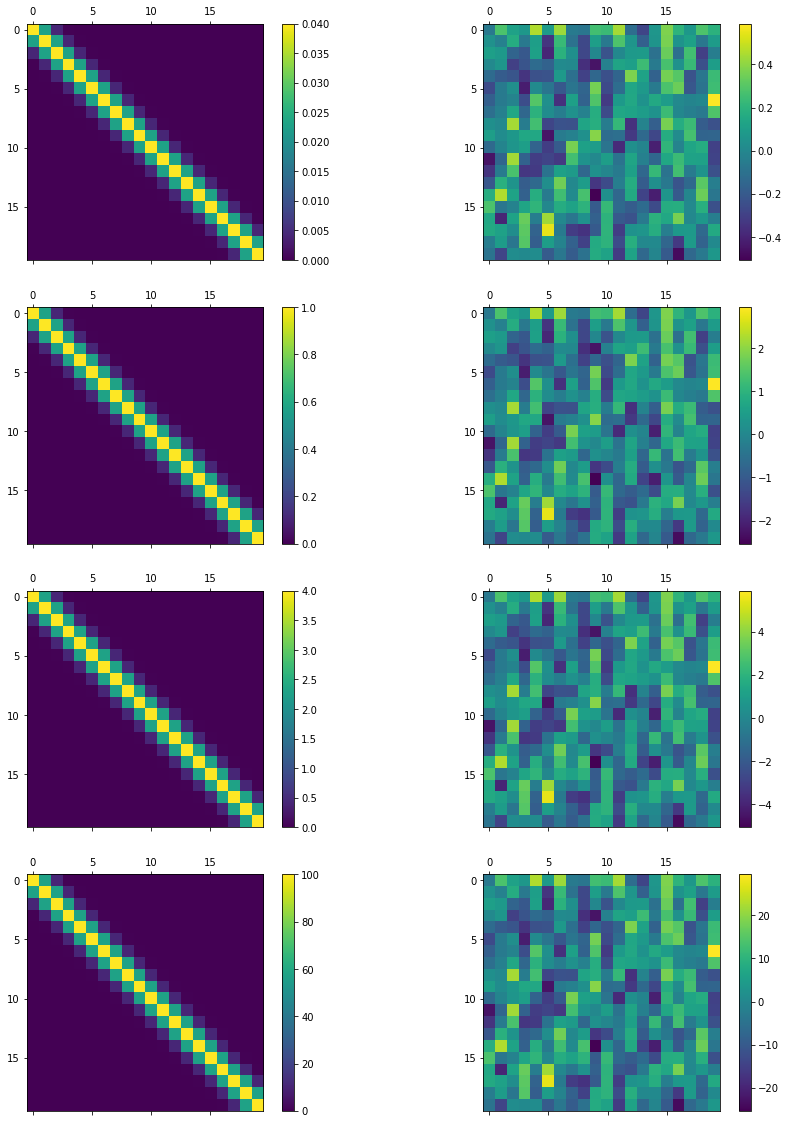

In [51]:
#Varying hyperparameters 
#(i) Varying sigma

CovMatrixA=np.zeros((20,20))
CovMatrixB=np.zeros((20,20))
CovMatrixC=np.zeros((20,20))
CovMatrixD=np.zeros((20,20))
X = np.linspace(0,20,20)
for i in range(0,20):
    for j in range(0,20):
        CovMatrixA[i][j]=squaredExponentialKernel(X[i],X[j],sigma=0.2)
        CovMatrixB[i][j]=squaredExponentialKernel(X[i],X[j],sigma=1)
        CovMatrixC[i][j]=squaredExponentialKernel(X[i],X[j],sigma=2)
        CovMatrixD[i][j]=squaredExponentialKernel(X[i],X[j],sigma=10)
        
        
L1=np.linalg.cholesky(CovMatrixA)
L2=np.linalg.cholesky(CovMatrixB)
L3=np.linalg.cholesky(CovMatrixC)
L4=np.linalg.cholesky(CovMatrixD)

u = np.random.normal(loc=0, scale=1, size=20*20).reshape(20, 20)

x1 = np.dot(L1, u)
x2 = np.dot(L2, u)
x3 = np.dot(L3, u)
x4 = np.dot(L4, u)


#Drawing subplots
        
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(15, 20))

im1 = axes[0,0].matshow(CovMatrixA)
im2=axes[0,1].matshow(x1)
im3 = axes[1,0].matshow(CovMatrixB)
im4=axes[1,1].matshow(x2)
im5 = axes[2,0].matshow(CovMatrixC)
im6=axes[2,1].matshow(x3)
im7 = axes[3,0].matshow(CovMatrixD)
im8=axes[3,1].matshow(x4)

fig.colorbar(im1, ax=axes[0,0])
fig.colorbar(im2, ax=axes[0,1])
fig.colorbar(im3, ax=axes[1,0])
fig.colorbar(im4, ax=axes[1,1])
fig.colorbar(im5, ax=axes[2,0])
fig.colorbar(im6, ax=axes[2,1])
fig.colorbar(im7, ax=axes[3,0])
fig.colorbar(im8, ax=axes[3,1])


Task 7

In [52]:
#Generating covariance matrix for 10D distribution using squared Exponentialk ernel
CovMatrix=np.zeros((10,10))
X = np.linspace(0,10,10)
for i in range(0,10):
    for j in range(0,10):
        CovMatrix[i][j]=squaredExponentialKernel(X[i],X[j])
        
X
        


array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

Partitioning at some random k between 0 and 10

In [53]:
CovPartition=np.array([[0,0],[0,0]])
def partition(k):
    CovPartition = np.array([[CovMatrix[:k, :k], CovMatrix[:k, k:]],
               [CovMatrix[k:, :k], CovMatrix[k:, k:]]])
    
    return CovPartition


In [54]:
#Covariance Matrix for conditional distribution

In [55]:
k=np.random.randint(0,10)
print(k)
CovPartition=partition(k)

9


In [56]:
print(CovPartition.shape)

(2, 2)


In [57]:
ConditionalCovarianceMatrix=CovPartition[0,0]-np.dot(np.dot(CovPartition[0,1],np.linalg.inv(CovPartition[1,1])),CovPartition[1,0])

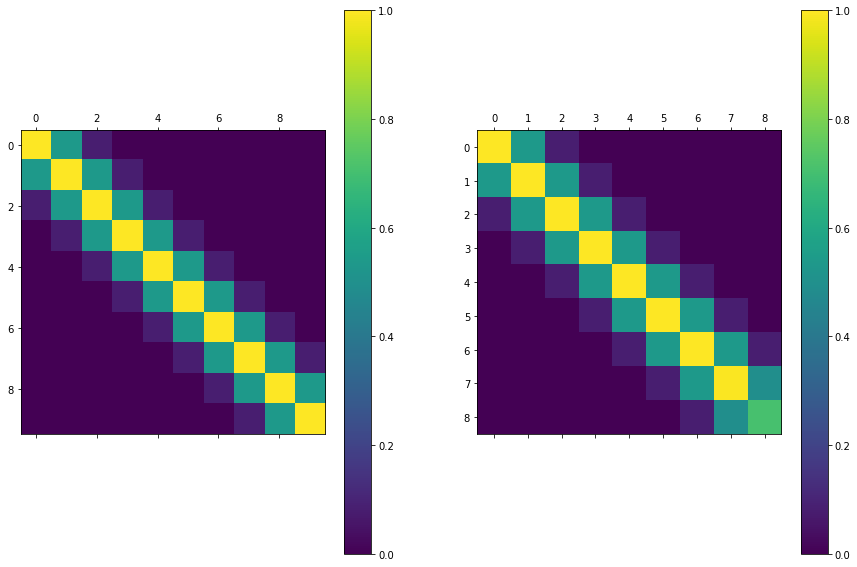

In [58]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 10))

im1 = axes[0].matshow(CovMatrix)
# im1.set_label("Unconditional Distribution")
im2=axes[1].matshow(ConditionalCovarianceMatrix)

fig.colorbar(im1, ax=axes[0])
fig.colorbar(im2, ax=axes[1])


In [59]:
#Task 8

In [60]:
MeanVector=np.array([0,1,2,3,4,5,6,7,8,9])
Xpartition=np.array([X[:k],X[k:]])

MeanPartition=np.array([MeanVector[:k],MeanVector[k:]])

Xpartition



array([array([0.        , 1.11111111, 2.22222222, 3.33333333, 4.44444444,
       5.55555556, 6.66666667, 7.77777778, 8.88888889]),
       array([10.])], dtype=object)

In [61]:
# x1|x2
# np.dot(CovPartition[0,1],np.linalg.inv(CovPartition[1,1])).shape
# (Xpartition[1:]-MeanPartition[1:]).shape

# ConditionalMean=MeanPartition[0:]+np.dot(np.dot(CovPartition[0,1],np.linalg.inv(CovPartition[1,1])),np.transpose(Xpartition[1:]-MeanPartition[1:]))

(1,)